<a href="https://colab.research.google.com/github/mohamedaitzaouit84-hue/Quantum-Gravity-Model-AitZaouit-/blob/main/Copy_of_AZT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

تشغيل الكود بواسطة: أحمد أيت زاويت  (Ahmed Ait Zaouit)
TT: Read 2507 points. ell range: 2.0 - 2508.0
TE: Read 1995 points. ell range: 2.0 - 1996.0
EE: Read 1995 points. ell range: 2.0 - 1996.0


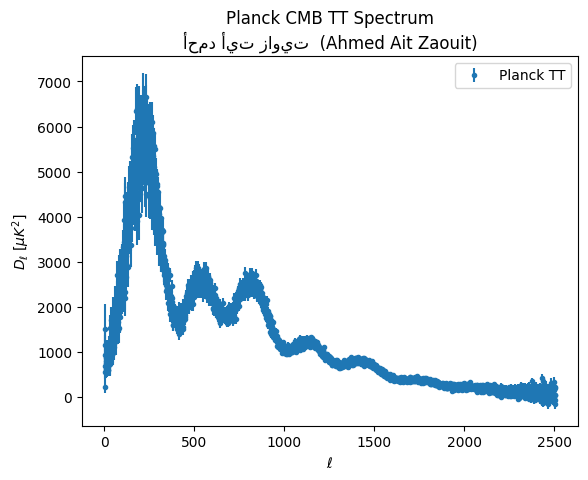

In [ ]:

# -----------------------------
# Colab: تحميل + قراءة + رسم CMB Planck TT/TE/EE
# الباحث: أحمد أيت زاويت  (Ahmed Ait Zaouit)
# -----------------------------
import os
import numpy as np
import matplotlib.pyplot as plt

# ✦ توقيع الحماية ✦
author_name = "أحمد أيت زاويت  (Ahmed Ait Zaouit)"
print(f"تشغيل الكود بواسطة: {author_name}")

# 1️⃣ إنشاء مجلد للبيانات
data_dir = "/content/planck_data"
os.makedirs(data_dir, exist_ok=True)

# 2️⃣ روابط الملفات
files = {
    "TT": "https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-full_R3.01.txt",
    "TE": "https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TE-full_R3.01.txt",
    "EE": "https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-EE-full_R3.01.txt"
}

# 3️⃣ تنزيل الملفات
for key, url in files.items():
    path = os.path.join(data_dir, f"COM_PowerSpect_CMB-{key}-full_R3.01.txt")
    if not os.path.exists(path):
        print(f"Downloading {key}...")
        os.system(f"wget -O {path} {url}")
    else:
        print(f"{key} already exists, skipping download.")

# 4️⃣ دالة قراءة البيانات
def read_planck_file(path):
    ells, Dells, errs = [], [], []
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            cols = line.split()
            ell = float(cols[0])
            D = float(cols[1])
            err = float(cols[2]) if len(cols) > 2 else 0.0
            ells.append(ell)
            Dells.append(D)
            errs.append(err)
    return np.array(ells), np.array(Dells), np.array(errs)

# 5️⃣ قراءة كل الملفات
data = {}
for key in files.keys():
    path = os.path.join(data_dir, f"COM_PowerSpect_CMB-{key}-full_R3.01.txt")
    ells, Dells, errs = read_planck_file(path)
    data[key] = {"ells": ells, "Dells": Dells, "errs": errs}
    print(f"{key}: Read {len(ells)} points. ell range: {ells.min()} - {ells.max()}")

# 6️⃣ رسم طيف TT كمثال + توقيع
plt.errorbar(data["TT"]["ells"], data["TT"]["Dells"], yerr=data["TT"]["errs"],
             fmt='o', markersize=3, label='Planck TT')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$ [$\mu K^2$]')
plt.title(f'Planck CMB TT Spectrum\n{author_name}')
plt.legend()
plt.show()